In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
iris = load_iris()
data = iris.data

In [4]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [5]:
# Convert to a DataFrame for better visualization
df = pd.DataFrame(data_scaled, columns=iris.feature_names)

In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
df['kmeans_labels'] = kmeans_labels

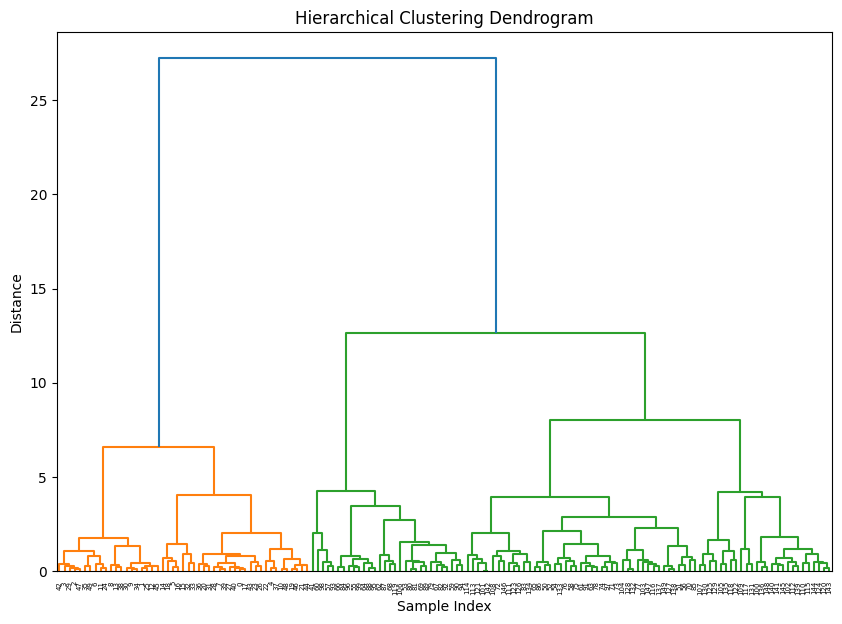

In [9]:
# Apply hierarchical clustering
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)
df['hierarchical_labels'] = hierarchical_labels


In [10]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
df['dbscan_labels'] = dbscan_labels

In [12]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
print(f'Silhouette Score for K-means: {kmeans_silhouette}')
print(f'Silhouette Score for Hierarchical: {hierarchical_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')



Silhouette Score for K-means: 0.4798814508199817
Silhouette Score for Hierarchical: 0.4466890410285909
Silhouette Score for DBSCAN: 0.3565164814270073


In [13]:
# Calculate Davies-Bouldin index
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans_labels)
hierarchical_davies_bouldin = davies_bouldin_score(data_scaled, hierarchical_labels)
dbscan_davies_bouldin = davies_bouldin_score(data_scaled, dbscan_labels)

print(f'Davies-Bouldin Index for K-means: {kmeans_davies_bouldin}')
print(f'Davies-Bouldin Index for Hierarchical: {hierarchical_davies_bouldin}')
print(f'Davies-Bouldin Index for DBSCAN: {dbscan_davies_bouldin}')

Davies-Bouldin Index for K-means: 0.7893630242997912
Davies-Bouldin Index for Hierarchical: 0.8034665302876753
Davies-Bouldin Index for DBSCAN: 7.124056948818223


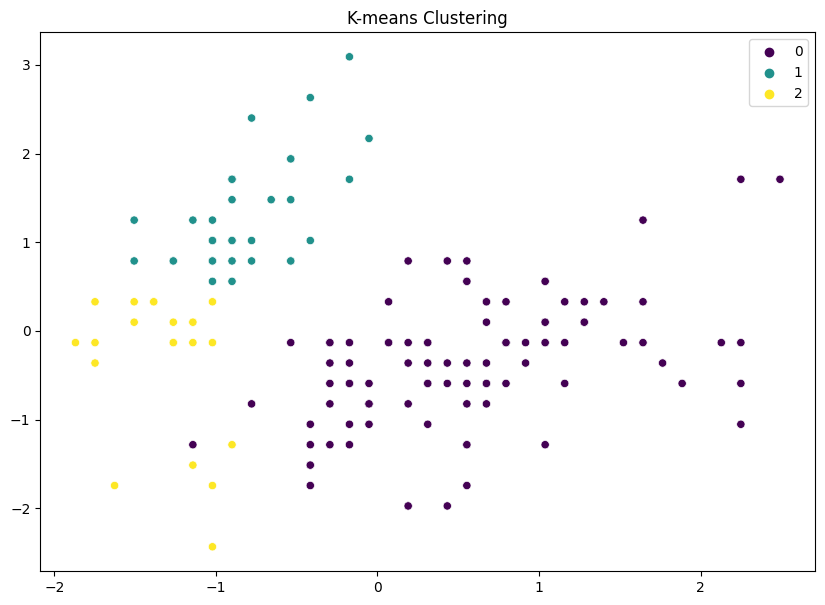

In [14]:
# Plot K-means clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.show()


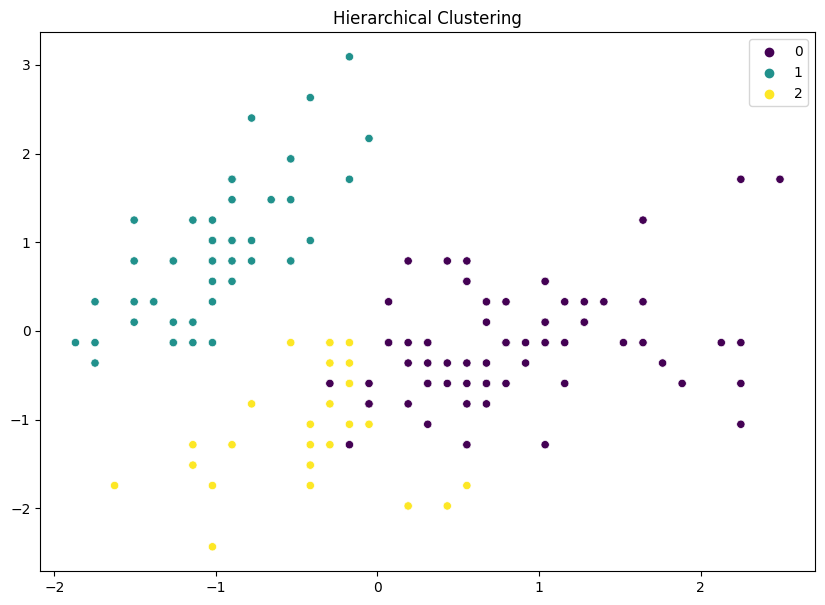

In [15]:
# Plot Hierarchical clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

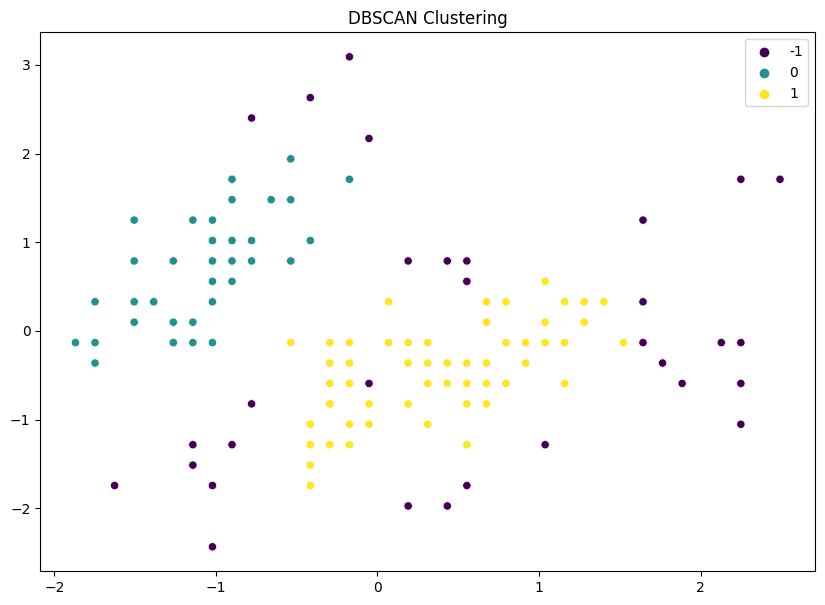

In [16]:
# Plot DBSCAN clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [17]:

# Function to load and preprocess dataset
def load_data(file):
    if file is None:
        return None
    df = pd.read_csv(file)
    return df